In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import costs
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    w=np.linalg.solve(tx.T@tx, tx.T@y)
    return w
    # ***************************************************
    raise NotImplementedError

In [3]:
least_squares(np.array([1,1,1]),np.array([[1,2,3],[2,4,1],[9,3,2]]))

array([1.29095701e-17, 2.00000000e-01, 2.00000000e-01])

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
from grid_search import grid_search,get_best_parameters,generate_w
from costs import compute_loss
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    print(least_squares(y,tx))
    
  

    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=10)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    print(w0_star,w1_star)
    # ***************************************************

Test it here

In [5]:
test_your_least_squares()

[73.293922   13.47971243]
66.66666666666669 16.666666666666686


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [7]:
np.c_[np.array([1,1,1]),2*np.array([1,1,1])]

array([[1, 2],
       [1, 2],
       [1, 2]])

In [ ]:
phi=[]
phi=np.c_[phi,np.array([1,1,1])]

In [8]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    phi=np.ones((len(x)))
    for i in range(degree):
        phi=np.c_[phi,x**(i+1)]
    return phi
    # ***************************************************
    raise NotImplementedError

In [ ]:
build_poly(x,2)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [9]:
from plots import *
from costs import compute_loss
import math
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        
        phi=build_poly(x,degrees[ind])
        np.shape(phi)
        weights=least_squares(y,phi)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        Lse=compute_loss(y,phi,weights)
        rmse=math.sqrt(2*Lse)
        # ***************************************************
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

In [ ]:
least_squares(y,build_poly(x,2))

In [ ]:
degrees = [1, 3, 7, 12]
for ind, degree in enumerate(degrees):
    print(degrees[ind])

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773748
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248677


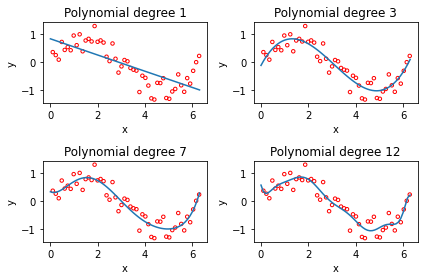

In [10]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [11]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    patest=ratio*len(y)
    te=round(patest)
    return (y[0:te],x[0:te],y[te:],x[te:])
    # ***************************************************
    raise NotImplementedError

In [ ]:
k=split_data(x,y,0.2)
k[0],k[1],k[2],k[3]


Then, test your `split_data` function below.

In [12]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    k=split_data(x,y,ratio)
    y_train=k[0]
    y_test=k[2]
    x_train=k[1]
    x_test=k[3]  
    # ***************************************************

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    xpoly_train=build_poly(x_train, degree)
    xpoly_test=build_poly(x_test, degree)
    # ***************************************************

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    weights=least_squares(y_train,xpoly_train)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr=math.sqrt(2*compute_loss(y_train,xpoly_train,weights))
    rmse_te=math.sqrt(2*compute_loss(y_test,xpoly_test,weights))
    #***************************************************
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [13]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.488, Testing RMSE=0.296
proportion=0.9, degree=3, Training RMSE=0.266, Testing RMSE=0.194
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.186
proportion=0.9, degree=12, Training RMSE=0.250, Testing RMSE=0.169
proportion=0.5, degree=1, Training RMSE=0.458, Testing RMSE=0.547
proportion=0.5, degree=3, Training RMSE=0.261, Testing RMSE=0.267
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.313
proportion=0.5, degree=12, Training RMSE=0.173, Testing RMSE=0.395
proportion=0.1, degree=1, Training RMSE=0.597, Testing RMSE=0.497
proportion=0.1, degree=3, Training RMSE=0.027, Testing RMSE=0.447
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=5.309
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=39.964


# 3 Ridge Regression
Please fill in the function below.

In [14]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    N=len(y)
    w=np.linalg.solve(tx.T@tx+(lambda_/(2*N))*np.eye(len(tx.T)), tx.T@y)
    return w
    # ***************************************************

In [15]:
print(ridge_regression(y,build_poly(x,2),0))

least_squares(y,build_poly(x,2))

[ 0.99142962 -0.43573925  0.02286838]


array([ 0.99142962, -0.43573925,  0.02286838])

In [16]:
from plots import *
from costs import compute_loss
import math
def polynomial_ridge_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        
        phi=build_poly(x,degrees[ind])
        np.shape(phi)
        weights=ridge_regression(y,phi,lamb)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        Lse=compute_loss(y,phi,weights)+lamb*(np.linalg.norm(weights))**2
        rmse=math.sqrt(2*Lse)
        # ***************************************************
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

In [ ]:
lamb=200
polynomial_ridge_regression()

In [21]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    k=split_data(x,y,ratio)
    y_train=k[0]
    y_test=k[2]
    x_train=k[1]
    x_test=k[3]  
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    xpoly_train=build_poly(x_train, degree)
    xpoly_test=build_poly(x_test, degree)
    # ***************************************************

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        weights=ridge_regression(y_train, xpoly_train, lambdas[ind])
        MSE_re_tr=compute_loss(y_train,xpoly_train,weights)+lambdas[ind]*(np.linalg.norm(weights))**2
        MSE_re_te=compute_loss(y_test,xpoly_test,weights)+lambdas[ind]*(np.linalg.norm(weights))**2
        rmse_tr=np.concatenate([rmse_tr,[math.sqrt(2*MSE_re_tr)]])
        rmse_te=np.concatenate([rmse_te,[math.sqrt(2*MSE_re_te)]])
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



In [ ]:
np.concatenate((np.ones(5),[3]))


In [ ]:
    lambdas=[32,3,4,4,23]
    for ind, lambda_ in enumerate(lambdas):
        print(lambdas[ind])

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.237, Testing RMSE=0.317
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.243, Testing RMSE=0.322
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.257, Testing RMSE=0.332
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.287, Testing RMSE=0.356
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.345, Testing RMSE=0.403
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.448, Testing RMSE=0.494
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.618, Testing RMSE=0.652
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.877, Testing RMSE=0.901
proportion=0.5, degree=7, lambda=0.007, Training RMSE=1.241, Testing RMSE=1.257
proportion=0.5, degree=7, lambda=0.016, Training RMSE=1.684, Testing RMSE=1.696
proportion=0.5, degree=7, lambda=0.037, Training RMSE=2.093, Testing RMSE=2.101
proportion=0.5, degree=7, lambda=0.085, Training RMSE=2.266, Testing RMSE=2.273
proportion=0.5, degree=7, lambda=0.193, 

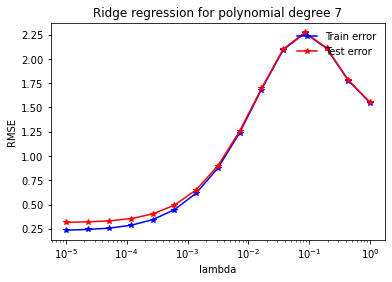

In [22]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)